# GeoSeries and folium
> First you will learn to get information about the geometries in your data with three different GeoSeries attributes and methods. Then you will learn to create a street map layer using folium. This is the Summary of lecture "Visualizing Geospatial Data in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/downtown_map.png

> Note : Folium map doesn't embed this page correctly. So use nbviewer for interactive map [link](https://nbviewer.jupyter.org/github/goodboychan/datacamp_repo/blob/master/Visualizing.Geospatial.Data.in.Python/GeoSeries-and-folium.ipynb)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (10, 5)

## GeoSeries attributes and methods I
- Shapely attributes and methods
    - GeoSeries.area - returns the area of each geometry in a GeoSeries
    - GeoSeries.centroid - returns the center point of each geometry in a GeoSeries
    - GeoSeries.distance(other) - returns the minimum distance to other

### Find the area of the Urban Residents neighborhood
How big is the Urban Residents neighborhood?



In [2]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('./dataset/neighborhoods.geojson')

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

In [3]:
# Print the head of the urban polygon
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg=3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.values, ' km squared')

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
The area of the Urban Residents neighborhood is  [1.12898961]  km squared


The Urban Residents neighborhood is around 1.13 square km. That seems manageable for walking to see the public art!

## GeoSeries attributes and methods II


### The center of the Urban Residents neighborhood
Now you'll find the center point of the `urban_poly_3857` and plot it over the polygon.



<class 'geopandas.geoseries.GeoSeries'>


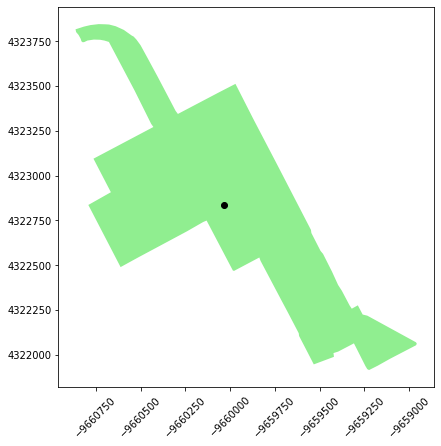

In [4]:
# Create downtown_cernter from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color='lightgreen', figsize=(7, 7));
downtown_center.plot(ax=ax, color='black');
plt.xticks(rotation=45);

You can see the centroid of the Urban Residents neighborhood. Notice that latitude and longitude are in meters instead of degrees. In the next exercise you will calculate the distance in meters of each artwork from the centroid of the Urban Residents neighborhood.

### Prepare to calculate distances
In this exercise you will prepare a GeoDataFrame called `art_dist_meters` with the locations of downtown art converted to meters using EPSG:3857. You will use `art_dist_meters` in the next exercise to calculate the distance of each artwork from the center of the Urban Residents neighborhood in meters.

In [5]:
from shapely.geometry import Point

art = gpd.read_file('./dataset/public_art.csv')
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
center_point = art.geometry.centroid

In [6]:
from shapely.geometry import Point

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry=art.geometry)
art_dist_meters.crs='epsg:4326'
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg=3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN          Sculpture              36.16234   

   Longitude        Mapped Location                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN    

In [7]:
art_dist_meters['center']

0      POINT (-86.83660 36.12856)
1      POINT (-86.77774 36.16234)
2      POINT (-86.78817 36.15790)
3      POINT (-86.79975 36.16202)
4      POINT (-86.78205 36.16215)
                  ...            
127    POINT (-86.82221 36.16510)
128    POINT (-86.73445 36.09082)
129    POINT (-86.66777 36.13469)
130    POINT (-86.78382 36.16527)
131    POINT (-86.79900 36.15896)
Name: center, Length: 132, dtype: geometry

The art_dist_meters Data Frame has the location of each artwork and the center point of the Urban Residents neighborhood -- both using meters for distance.

### Art distances from neighborhood center
Now that you have the center point and the art locations in the units we need to calculate distances in meters, it's time to perform that step.



In [8]:
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(other=ctr)
    
# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 10583948.500651475,
 'A Splash of Color': 10585357.160178259,
 'A Story of Nashville': 10583565.969078569,
 'Aerial Innovations Mural': 10579929.255218184,
 'Airport Sun Project': 10570311.412935875,
 'Andrew Jackson': 10583951.468665037,
 'Angel': 10588435.041707946,
 'Anticipation': 10583698.952539692,
 'April Baby': 10586916.00892881,
 'Arial Triangle [from the Gravity Series]': 10583398.52483797,
 'Ariel': 10585905.336208293,
 'Athena Parthenos': 10586065.827814262,
 'Benedictio': 10577769.979416678,
 'Bicycle Bus-Green Fleet': 10582635.68286198,
 'Blowing Bubbles': 10588435.041707946,
 'Breaking Bread': 10582634.392548595,
 'Building a Positive Community': 10582136.29114304,
 'Can-Do': 10582120.049094511,
 'Chet Atkins': 10583602.67968694,
 "Children's Chairs For The Seasons": 10583565.969078569,
 'Confederate Memorial': 10577769.979416678,
 'Confederate Private Monument': 10585868.029575413,
 'Confluence': 10585513.082652403,
 'Cool Fences': 10579074.34680

## Street maps with folium
- Folium
    - python package
    - interactive maps
    - built upon Leaflet.js

### Create a folium location from the urban centroid
In order to construct a folium map of the Urban Residents neighborhood, you need to build a coordinate pair location that is formatted for folium.

In [9]:
urban_polygon.crs = 'epsg:4326'

In [10]:
urban_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.to_crs(epsg=4326).centroid

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
41    POINT (-86.77756 36.16128)
dtype: geometry
[41    36.161278
dtype: float64, 41   -86.777565
dtype: float64]


C:\Users\kcsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


Folium locations are arrays with latitude first. You just created a folium location from the center of the Urban Residents neighborhood.

### Create a folium map of downtown Nashville
In this exercise you will create a street map of downtown Nashville using folium.

In [12]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)

# Display the map
downtown_map.save('./html/downtown_map.html')

downtown_map

In [13]:
HTML('./html/downtown_map.html')

Folium locations are arrays with latitude first. You just created a folium location from the center of the Urban Residents neighborhood.

### Folium street map of the downtown neighborhood
This time you will create the folium map of downtown and add the Urban Residents neighborhood area from urban_polygon.



In [14]:
urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid

C:\Users\kcsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\kcsgo\anaconda3\lib\site-packages\geopandas\geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [15]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center
folium_loc = [point.values.y, point.values.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15, width=500, height=500)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

downtown_map.save('html/downtown_map2.html')

downtown_map

In [16]:
HTML('./html/downtown_map2.html')

## Creating markers and popups in folium


### Adding markers for the public art
Now that you have added the polygon for the Urban Residents neighborhood to your folium street map, it's time to add the locations of the art within the neighborhood. You can do that by creating folium markers. Each marker needs a location assigned. Use `iterrows()` to loop through the data to grab the values you need.



In [17]:
# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)

# Spartially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op='within')

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

In [18]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
    print('first part: ', row[0])
    print('second part: ', row[1])
    
# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location=location)
    marker.add_to(downtown_map)

downtown_map.save('html/downtown_map3.html')    

downtown_map

first part:  1
second part:  Title                  [Fourth and Commerce Sculpture]
Last Name                                       Walker
First Name                                         Lin
Location             333 Commerce Street, Nashville TN
Medium                                                
Type                                         Sculpture
Description                                           
Latitude                                      36.16234
Longitude                                    -86.77774
Mapped Location                  (36.16234, -86.77774)
geometry           POINT (-86.77773999999999 36.16234)
center             POINT (-86.77773999999999 36.16234)
index_right                                         41
name                                   Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name 

In [19]:
HTML('./html/downtown_map3.html')

You have created a folium map of downtown Nashville, a polygon showing the Urban Residents neighborhood, and markers to show the location of the artworks. All that's left is to create some popups for the markers!

### Troubleshooting data issues
You will be building popups for the downtown art using the `title` and `desc` columns from the `urban_art` DataFrame. Here, you will inspect those columns to identify and clean up any problematic values.



In [20]:
# Print the urban_art titles
print(urban_art.Title)

# Print the urban_art description
print(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace=True)
urban_art.Description.str.replace("'", "`")

# Print the urban_art descriptions again
print(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

C:\Users\kcsgo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### A map of downtown art
Now you will assign a popup to each marker to give information about the artwork at each location. In particular you will assign the art title and description to the popup for each marker. You will do so by creating the map object downtown_map, then add the popups, and finally use the display function to show your map.

One warning before you start: you'll need to ensure that all instances of single quotes (') are removed from the pop-up message, otherwise your plot will not render!


In [26]:
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']) + ': ' + str(row_values['Description'])[:20])
    
    marker = folium.Marker(location = location, popup=popup)
    marker.add_to(downtown_map)

downtown_map.save('./html/downtown_map4.html')
# Display the map.
downtown_map

In [27]:
HTML('./html/downtown_map4.html')